## Homework 3, Problem 3 on inhomogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2022, Prof. J.C. Kao, TAs T. Monsoor, W. Yu.


 In this problem, we will use the same simulated neuron as in
  Problem 2, but now the reaching angle $s$ will be time-dependent
  with the following form:
$$ s(t) = t^2 \cdot \pi,$$

where $t$ ranges between 0 and 1 second. This will be refered as *s(t)* equation in the questions.


In [43]:
"""
ECE C143/C243 Homework-3 Problem-3

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (6 points) Spike trains
Generate 100 spike trains, each 1 second in duration, according to
an inhomogeneous Poisson process with a firing rate profile defined
by tuning equation, $$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$ 
and the $s(t)$ equation, $$ s(t) = t^2 \cdot \pi$$

In [44]:
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 # trial length (ms)

In [45]:
np.random.exponential(1.0/r_max * 1000)

72.40687129967107

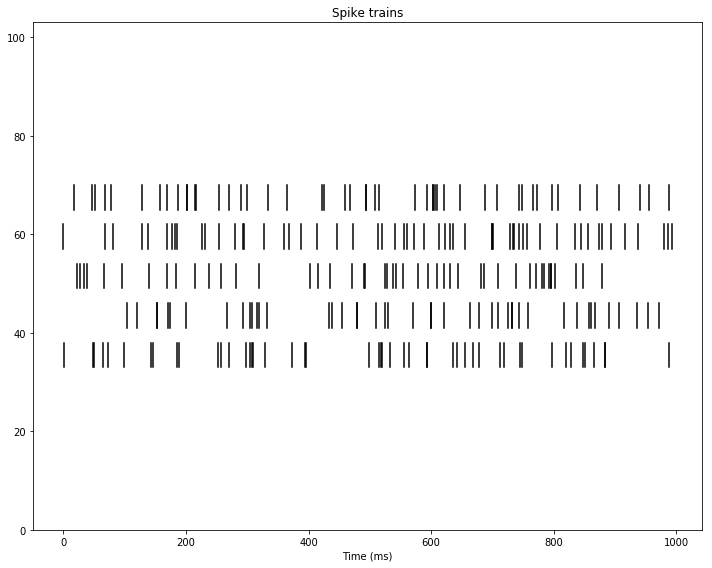

In [46]:
## 3a
num_trials = 100 # number of total spike trains
num_rasters_to_plot = 5 # number of spike trains to plot
#====================================================#
# YOUR CODE HERE:
#   Generate the spike times for 100 trials of an inhomogeneous
#   Poisson process.  Plot 5 example spike rasters.
#====================================================#
spike_times = np.empty(( num_trials), dtype=list)
for trial in range(num_trials):
    spike_times[trial] = nsp.GeneratePoissonSpikeTrain(T, rate=r_max)
    # thin the train
    del_ind = []
    for spike in range(len(spike_times[trial])):
        l_T_i = r_0 + (r_max-r_0)*np.cos(np.pi*((spike_times[trial][spike]/1000)**2)-s_max)
        if (np.random.rand()>(l_T_i/r_max)):
            del_ind.append(spike)
    spike_times[trial] = np.delete(spike_times[trial],del_ind)        

plt.figure(figsize=(10,8))
nsp.PlotSpikeRaster(spike_times[0:num_rasters_to_plot])
plt.title('Spike trains')
plt.tight_layout()

#====================================================#
# END YOUR CODE
#====================================================#


### (b) (5 points) Spike histogram
  Plot the spike histogram by taking spike counts in non-overlapping
  20 ms bins, then averaging across the 100 trials.  The spike
  histogram should have firing rate (in spikes / second) as the
  vertical axis and time (in msec, not time bin index) as the
  horizontal axis. Plot the expected firing rate profile defined by equations
 tuning equation and *s(t)* equation on the same plot. 

Text(0.5,0,'Time(ms)')

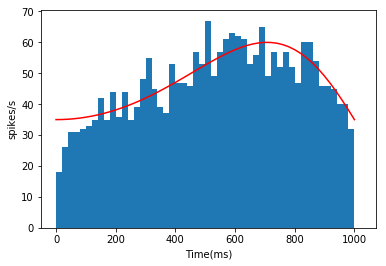

In [47]:
# 3b
bin_width = 20 # (ms)
#====================================================#
# YOUR CODE HERE:
#   Plot the spike histogram
#====================================================#
edges = np.arange(0,1020,bin_width)
heights = np.zeros_like(edges)
for (i,height) in enumerate(heights):
    if edges[i] < edges[-1]:
        spike_count =0
        for trial in range(num_trials):
            spike_count += np.sum((spike_times[trial][1:]<=edges[i+1])*(spike_times[trial][1:]>=edges[i]))/num_trials
        heights[i] = (spike_count/20)*1000
plt.bar(edges, heights, width=20, align='edge')
plt.plot(edges,r_0 + (r_max-r_0)*np.cos(np.pi*((edges/1000)**2)-s_max), c="red")
#====================================================#
# END YOUR CODE
#====================================================#

plt.ylabel('spikes/s')
plt.xlabel('Time(ms)')

#### Question:
Does the spike histogram agree with the expected firing rate profile?

#### Your Answer:

yes, the spike histogram follows our expected firing rate profile fairly well. We see some deviation but this is to be expected since this is an empirical result created from random variables. In larger data sizes we would expect the curves to more closely converge (stochastic noise will be averaged out).

### (c) (6 points) Count distribution
  For each trial, count the number of spikes across the entire trial.
  Plot the normalized distribution of spike counts.  Fit a Poisson
  distribution to this empirical distribution and plot it on top of
  the empirical distribution.  

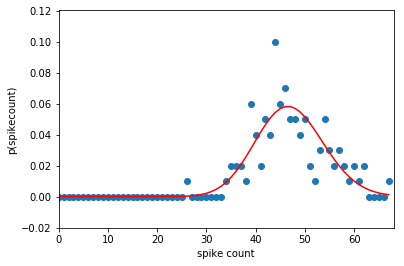

In [48]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of spike counts
#====================================================#
spike_counts = np.zeros((num_trials)) 
for rep in range(num_trials):
    spike_counts[rep] = int(len(spike_times[rep][1:]))
mean_rates = np.mean(spike_counts)
max_count = np.max(spike_counts)
spike_count_bin_centers =  np.arange(0,max_count,1)

bins = np.zeros_like(spike_count_bin_centers)
for i,item in enumerate(bins):
    if spike_count_bin_centers[i]<spike_count_bin_centers[-1]:
        bins[i] = np.sum((spike_counts>=spike_count_bin_centers[i])*(spike_counts<spike_count_bin_centers[i+1]))/num_trials
    else:
        bins[i] = np.sum((spike_counts>=spike_count_bin_centers[i])*(spike_counts<max_count+1))/num_trials
est_rate = mean_rates
p_dist = np.power(np.array([est_rate]*len(spike_count_bin_centers)),spike_count_bin_centers)*np.exp(-est_rate)/scipy.special.factorial(spike_count_bin_centers)

plt.scatter(spike_count_bin_centers,bins)    
plt.plot(spike_count_bin_centers, p_dist, c="red")
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlim([0, max_count])
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('spike count')
plt.ylabel('p(spikecount)')
plt.show()

#### Question:
Should we expect the spike counts to be Poisson-distributed?

#### Your Answer:

Yes we should expect the spike counts to be Poisson distrubuted. This is because the non-homogenous process is created from thinning a homogenous poisson process. By the thinning property, thinning a poisson process yeilds a poisson process, thus we would expect the spike counts to be poisson distributed. The deviations we see are due to stochastic noise and are drastically reduced when we force the number of trials to be much higher (attempted with 10000). 

### (d) (5 points) ISI distribution
  Plot the normalized distribution of ISIs.  Fit an exponential
  distribution to the empirical distribution and plot it on top of the
  empirical distribution. 

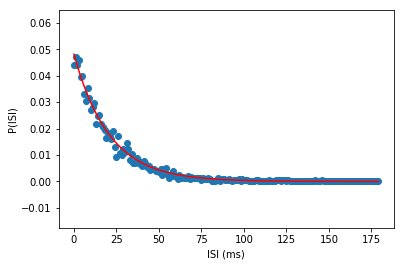

In [50]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of ISIs
#====================================================#

ISI = np.zeros_like(spike_times)
mean_ISI = np.zeros_like(spike_times)
max_ISI = 0.0
for rep in range(num_trials):
    ISI[rep] = np.diff(spike_times[rep])
    mean_ISI[rep] = np.mean(ISI[rep])
    max_ISI = np.maximum(np.max(ISI[rep]),max_ISI)
avg_ISI = np.mean(mean_ISI)
lambd = 1/avg_ISI
ISI_bin_centers =  np.arange(0,max_ISI,1)

bins = np.zeros_like(ISI_bin_centers)
for i,item in enumerate(bins):
    data_points =0;
    for rep in range(num_trials):
        if ISI_bin_centers[i]<ISI_bin_centers[-1]:
            bins[i] += np.sum((ISI[rep]>=ISI_bin_centers[i])*(ISI[rep]<ISI_bin_centers[i+1]))
            data_points += len(ISI[rep])
        else:
            bins[i] += np.sum((ISI[rep] >= ISI_bin_centers[i])*(ISI[rep]<max_ISI+1))
            data_points += len(ISI[rep])
    bins[i]/= data_points
p_dist = lambd*np.exp(-lambd*ISI_bin_centers)

plt.scatter(ISI_bin_centers, bins)
plt.plot(ISI_bin_centers, p_dist, c ="red")
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('ISI (ms)')
plt.ylabel('P(ISI)')
plt.show()

#### Question: 
Should we expect the ISIs to be exponentially-distributed?
(Note, it is possible for the  empirical distribution to strongly resemble an exponential distribution even if the data aren't exponentially distributed.)

#### Your Answer:

No, we should not expect the ISI's to be exponentially distributed. This is because the intervals of a non-homogenous poisson process are not exponentially distributed, so we should not expect that distribution to be representative of our results. We should note that the results resemble the distribution closely, but we should not believe it to be perfectly exponentially distributed.